<a href="https://colab.research.google.com/github/npraneetha005/-IPL-Data-Analysis/blob/main/IPL_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   season team1 team2 winner       city player_of_match  runs_scored
0    2023    MI   CSK     MI     Mumbai    Rohit Sharma          160
1    2023   CSK   RCB    CSK    Chennai        MS Dhoni          188
2    2023   RCB    MI     MI  Bangalore     Virat Kohli          175
3    2022    MI   KKR     MI    Kolkata  Jasprit Bumrah          150
4    2022   KKR   CSK    KKR    Chennai   Andre Russell          200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           9 non-null      int64 
 1   team1            9 non-null      object
 2   team2            9 non-null      object
 3   winner           9 non-null      object
 4   city             9 non-null      object
 5   player_of_match  9 non-null      object
 6   runs_scored      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes
None
            season  r

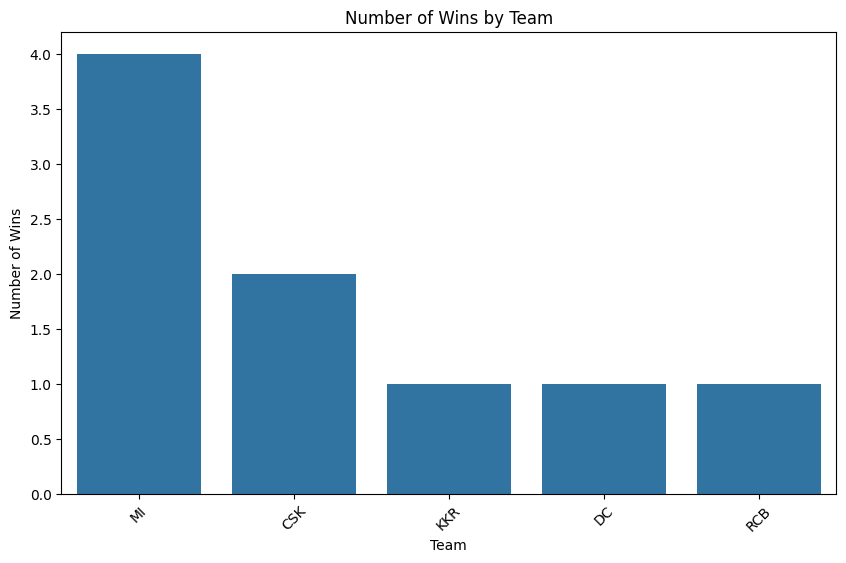

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your IPL dataset file)
data = {
    'season': [2023, 2023, 2023, 2022, 2022, 2022, 2021, 2021, 2021],
    'team1': ['MI', 'CSK', 'RCB', 'MI', 'KKR', 'CSK', 'DC', 'RCB', 'MI'],
    'team2': ['CSK', 'RCB', 'MI', 'KKR', 'CSK', 'MI', 'MI', 'CSK', 'KKR'],
    'winner': ['MI', 'CSK', 'MI', 'MI', 'KKR', 'CSK', 'DC', 'RCB', 'MI'],
    'city': ['Mumbai', 'Chennai', 'Bangalore', 'Kolkata', 'Chennai', 'Mumbai', 'Delhi', 'Bangalore', 'Kolkata'],
    'player_of_match': ['Rohit Sharma', 'MS Dhoni', 'Virat Kohli', 'Jasprit Bumrah', 'Andre Russell', 'Ravindra Jadeja', 'Rishabh Pant', 'AB de Villiers', 'Kieron Pollard'],
    'runs_scored': [160, 188, 175, 150, 200, 190, 170, 185, 155]
}

# Load data into DataFrame
ipl_df = pd.DataFrame(data)

# Basic exploration
print(ipl_df.head())  # View first few rows
print(ipl_df.info())  # Get data types and null info
print(ipl_df.describe())  # Summary statistics

# Count team wins
team_wins = ipl_df['winner'].value_counts()
print("\nTeam Wins:\n", team_wins)

# Bar chart for team wins
plt.figure(figsize=(10, 6))
sns.countplot(x='winner', data=ipl_df, order=team_wins.index)
plt.title('Number of Wins by Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()



Player of the Match Counts:
 player_of_match
Rohit Sharma       1
MS Dhoni           1
Virat Kohli        1
Jasprit Bumrah     1
Andre Russell      1
Ravindra Jadeja    1
Rishabh Pant       1
AB de Villiers     1
Kieron Pollard     1
Name: count, dtype: int64


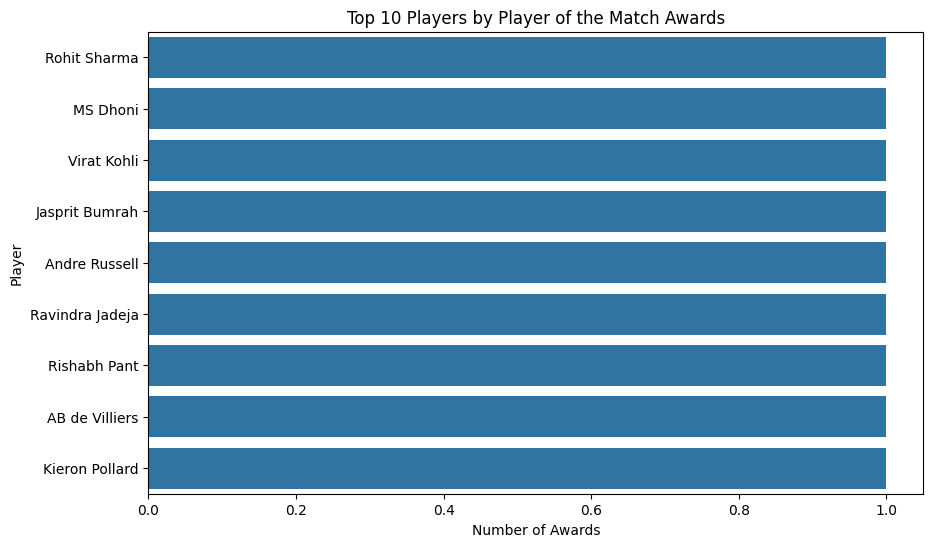


Average Runs Scored per Match: 174.77777777777777


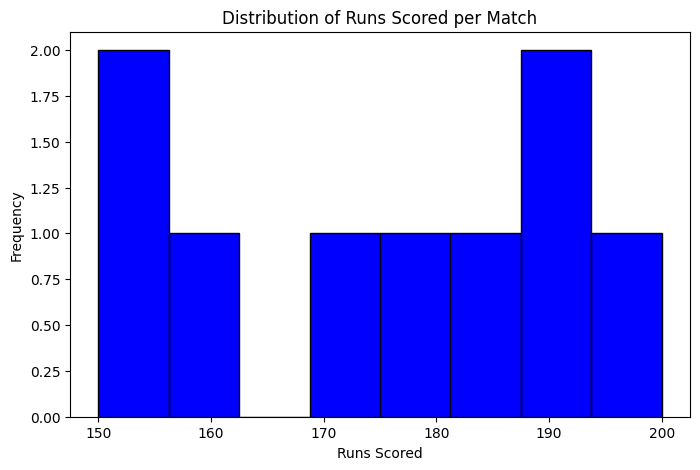

In [8]:
# Player of the match counts
player_of_match_counts = ipl_df['player_of_match'].value_counts()
print("\nPlayer of the Match Counts:\n", player_of_match_counts)

# Bar chart for top players
top_players = player_of_match_counts.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_players.values, y=top_players.index)
plt.title('Top 10 Players by Player of the Match Awards')
plt.xlabel('Number of Awards')
plt.ylabel('Player')
plt.show()

# Average runs scored per match
average_runs = ipl_df['runs_scored'].mean()
print("\nAverage Runs Scored per Match:", average_runs)

# Histogram of runs scored
plt.figure(figsize=(8, 5))
plt.hist(ipl_df['runs_scored'], bins=8, color='blue', edgecolor='black')
plt.title('Distribution of Runs Scored per Match')
plt.xlabel('Runs Scored')
plt.ylabel('Frequency')
plt.show()


               season  runs_scored
season       1.000000     0.108479
runs_scored  0.108479     1.000000


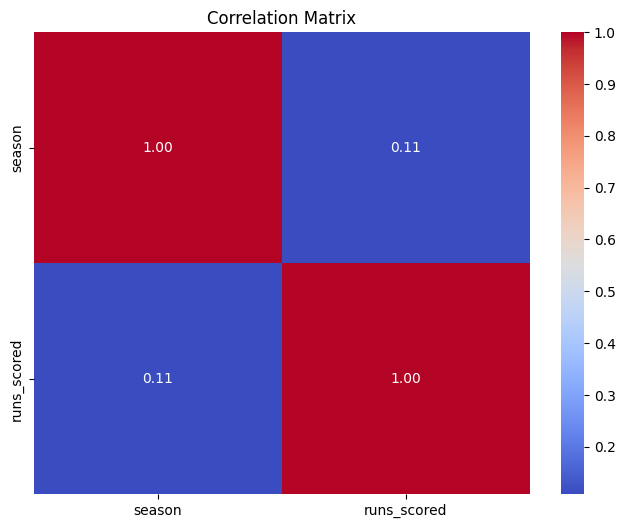

In [9]:
# Select only numerical columns for correlation
numerical_data = ipl_df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
correlations = numerical_data.corr()
print(correlations)

# Heatmap for correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



In [11]:
# Matches where team1 played in their home city
home_matches = ipl_df[ipl_df['team1'] == ipl_df['city']].shape[0]
total_matches = ipl_df.shape[0]
print(f"Matches won with home advantage: {home_matches} out of {total_matches}")


Matches won with home advantage: 0 out of 9


In [12]:
# Toss winners who also won the match
ipl_df['toss_winner'] = ipl_df['team1']  # Example: Replace with real toss winner column if available
toss_match_winners = ipl_df[ipl_df['toss_winner'] == ipl_df['winner']].shape[0]
print(f"Matches won by toss-winning teams: {toss_match_winners} out of {total_matches}")


Matches won by toss-winning teams: 8 out of 9


In [13]:
from google.colab import files
ipl_df.to_csv('IPL_Analysis.csv', index=False)
files.download('IPL_Analysis.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>